In [1]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss
from common.util import preprocess, create_contexts_target, convert_one_hot, most_similar
from common.trainer import Trainer
from common.optimizer import Adam

In [2]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
        
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

In [53]:
window_size = 2
hidden_size = 10
batch_size = 30
max_epoch = 100

In [54]:
from dataset import ptb
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus = corpus[:1000]

In [55]:
vocab_size = len(word_to_id)
vocab_size

10000

In [56]:
contexts, target = create_contexts_target(corpus, window_size)

In [57]:
target = convert_one_hot(target, vocab_size)

In [58]:
target.shape

(996, 10000)

In [59]:
contexts = convert_one_hot(contexts, vocab_size)

In [60]:
contexts.shape

(996, 4, 10000)

| epoch 1 | iter 1 / 33 | time 0[s] | loss 9.21
| epoch 1 | iter 21 / 33 | time 0[s] | loss 9.21
| epoch 2 | iter 1 / 33 | time 0[s] | loss 9.21
| epoch 2 | iter 21 / 33 | time 0[s] | loss 9.21
| epoch 3 | iter 1 / 33 | time 0[s] | loss 9.20
| epoch 3 | iter 21 / 33 | time 1[s] | loss 9.19
| epoch 4 | iter 1 / 33 | time 1[s] | loss 9.17
| epoch 4 | iter 21 / 33 | time 1[s] | loss 9.13
| epoch 5 | iter 1 / 33 | time 1[s] | loss 9.09
| epoch 5 | iter 21 / 33 | time 1[s] | loss 9.03
| epoch 6 | iter 1 / 33 | time 2[s] | loss 8.96
| epoch 6 | iter 21 / 33 | time 2[s] | loss 8.88
| epoch 7 | iter 1 / 33 | time 2[s] | loss 8.79
| epoch 7 | iter 21 / 33 | time 2[s] | loss 8.68
| epoch 8 | iter 1 / 33 | time 2[s] | loss 8.58
| epoch 8 | iter 21 / 33 | time 2[s] | loss 8.44
| epoch 9 | iter 1 / 33 | time 3[s] | loss 8.33
| epoch 9 | iter 21 / 33 | time 3[s] | loss 8.19
| epoch 10 | iter 1 / 33 | time 3[s] | loss 8.03
| epoch 10 | iter 21 / 33 | time 3[s] | loss 7.89
| epoch 11 | iter 1 / 33 | t

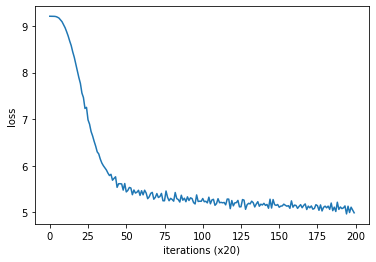

In [61]:
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [62]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

aer [-0.09157106 -0.30796844  0.41513664 -0.4071408   0.41071758  0.11112974
 -0.2572804  -0.45996678  0.12776764 -0.08827619]
banknote [-0.08927463 -0.25167048  0.47325528 -0.48091424  0.5226751  -0.00790753
 -0.3284766  -0.5561884   0.26001143 -0.2190554 ]
berlitz [-0.2245398  -0.06327496  0.43054095 -0.41636935  0.47739983 -0.20614748
 -0.38598844 -0.2672516   0.45616606 -0.4102596 ]
calloway [-0.4338194  -0.18032749  0.46888152 -0.32441175  0.4089347  -0.03985661
 -0.45843357 -0.20095493  0.4907164  -0.14850864]
centrust [-0.5114415  -0.34867558  0.2842089  -0.2562421   0.23837715  0.11988848
 -0.45431232 -0.3257295   0.52863765  0.12497056]
cluett [-0.53267366 -0.42781964  0.23463114 -0.33485386  0.14649065  0.1872274
 -0.36225    -0.36734098  0.5580141   0.11027905]
fromstein [-0.49981984 -0.36757103  0.30585665 -0.2752736   0.12994674  0.38321579
 -0.22190908 -0.3834374   0.5504481   0.1244722 ]
gitano [-0.540117   -0.3017372   0.2734896  -0.35873947  0.19162156  0.32764807
 -0.

In [66]:
most_similar('year', word_to_id, id_to_word, word_vecs)


[query] year
expected: 0.9991434812545776
nor: 0.9989174604415894
group: 0.997979998588562
ago: 0.9977084994316101
surviving: 0.9976335763931274
